In [7]:
# !pip install jupyterlab "ipywidgets>=7.5" 
# !pip install npm
# !conda install -c conda-forge nodejs
# !pip install plotly

^C


In [8]:
# 加载必要库
import pandas as pd # 数据分析库
import numpy as np # 矩阵计算
import matplotlib.pyplot as plt # 画图

import plotly.express as px # 画图
from statsmodels.graphics.gofplots import qqplot # 统计模型
import seaborn as sns # 统计绘图
%matplotlib inline

# 避免产生报警告
import warnings 
warnings.filterwarnings('ignore')

## 数据加载

In [3]:
# 加载数据
## 参考链接：https://scikit-learn.org/stable/modules/generated/sklearn.datasets.load_boston.html#sklearn.datasets.load_boston
# data_url = "http://lib.stat.cmu.edu/datasets/boston" # 数据来源
# raw_df = pd.read_csv(data_url, sep="\s+", skiprows=22, header=None) # 用pandas读csv文件
# data = np.hstack([raw_df.values[::2, :], raw_df.values[1::2, :2]])
# target = raw_df.values[1::2, 2]

In [9]:
house = pd.read_csv("boston.csv")
house.head() # 读前五行

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222.0,18.7,396.90,5.33,36.2


特征：
- CRIM：按城镇划分的人均犯罪率
- ZN：划分为超过 25,000 平方英尺地块的住宅用地比例。
- INDUS：每个城镇的非零售商业用地的比例
- CHAS：Charles River 虚拟变量（如果区域以河流为界，则为 1；否则为 0）
- NOX：一氧化氮浓度（每 1000 万分之一）[parts/10M]
- RM：每户住宅的平均房间数
- AGE：1940 年之前建造的自住单元的比例
- DIS：到波士顿五个就业中心的加权距离
- RAD：通往径向高速公路的指数
- TAX：全每 10,000 美元的价值财产税率 [\$/10k]
- PTRATIO：按城镇划分的师生比例
- B：等式 $B=1000(Bk - 0.63)^2$ 的结果，其中 $Bk$ 是城镇中黑人的比例
- LSTAT：人口地位较低的百分比

标签：

MEDV：自住房屋的中位数价值 1000 美元 [k\$]

## 数据概况

In [4]:
# 数据的规模
house.shape

(506, 14)

可以看到，本次我们用到的数据集总共有506条样本(行)也就是有506套房子的数据；同时有14列，其中13列是特征，也就是每个房子会有13个属性特征，例如：住宅的房间数、交通方便度等信息，最后一列是房子的标签——房价. 这个数据集主要的一个想法是，利用房子的13个属性特征，对房子的价格进行预测. 

In [5]:
# 对数据集数据的基本统计描述
# 这个命令非常便捷，呈现了这个数据集的基本统计分布，这是对每一列而言的，统计量包括：最大值，最小值，
house.describe()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
count,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000
mean,3.613524,11.363636,11.136779,0.069170,0.554695,6.284634,68.574901,3.795043,9.549407,408.237154,18.455534,356.674032,12.653063,22.532806
std,8.601545,23.322453,6.860353,0.253994,0.115878,0.702617,28.148861,2.105710,8.707259,168.537116,2.164946,91.294864,7.141062,9.197104
min,0.006320,0.000000,0.460000,0.000000,0.385000,3.561000,2.900000,1.129600,1.000000,187.000000,12.600000,0.320000,1.730000,5.000000
25%,0.082045,0.000000,5.190000,0.000000,0.449000,5.885500,45.025000,2.100175,4.000000,279.000000,17.400000,375.377500,6.950000,17.025000
50%,0.256510,0.000000,9.690000,0.000000,0.538000,6.208500,77.500000,3.207450,5.000000,330.000000,19.050000,391.440000,11.360000,21.200000
75%,3.677083,12.500000,18.100000,0.000000,0.624000,6.623500,94.075000,5.188425,24.000000,666.000000,20.200000,396.225000,16.955000,25.000000
max,88.976200,100.000000,27.740000,1.000000,0.871000,8.780000,100.000000,12.126500,24.000000,711.000000,22.000000,396.900000,37.970000,50.000000


> ```df.describe()```这个命令非常便捷，呈现了这个数据集的基本统计分布，这是对每一列数值型变量而言的，统计量包括：频数，均值，方差，最大值，最小值，中位数，25，75分位数.

从这个表我们呢可以大致获得一些处理思路，如：
- 从第一行我们可以看到所有的```count```也就是数目统计，所有特征都是506等于样本数的，说明这个数据集至少是没有缺失值的.
- 第一列```CRIM```是一个犯罪率，是一个在$[0,1]$之间的实数，自然75%分位数，最大值都不可能超过1，所以显然这一列的数据是有异常的，后面我们需要进行一些处理.
- 对于```TAX```，我们可以看到它的方差非常的大，因此在后续的处理过程中，我们可以采用一些降维的手段如：主成分分析（PCA）等.

> 有时候我们也可以通过```df.info()```去对数据集作一个简单的概述，更多的是看确实情况，以及变量的类型，通过变量类型分析数据处理的方法.

In [11]:
house.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 506 entries, 0 to 505
Data columns (total 14 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   CRIM     506 non-null    float64
 1   ZN       506 non-null    float64
 2   INDUS    506 non-null    float64
 3   CHAS     506 non-null    int64  
 4   NOX      506 non-null    float64
 5   RM       506 non-null    float64
 6   AGE      506 non-null    float64
 7   DIS      506 non-null    float64
 8   RAD      506 non-null    int64  
 9   TAX      506 non-null    float64
 10  PTRATIO  506 non-null    float64
 11  B        506 non-null    float64
 12  LSTAT    506 non-null    float64
 13  MEDV     506 non-null    float64
dtypes: float64(12), int64(2)
memory usage: 55.5 KB


## 数据处理
### 缺失值处理
为了给大家演示缺失值的处理，我们在Boston房价数据集的基础上手动删除了一些数据，来模拟数据的缺失，存为以```boston_null.csv```文件，下面以该文件进行讲解.



In [12]:
null = pd.read_csv("boston_null.csv")
null.head() # 读前五行

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0,NaN,7.147,54.2,6.0622,3,222,18.7,396.90,5.33,36.2


In [13]:
null.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 506 entries, 0 to 505
Data columns (total 14 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   CRIM     506 non-null    float64
 1   ZN       506 non-null    float64
 2   INDUS    506 non-null    float64
 3   CHAS     506 non-null    int64  
 4   NOX      504 non-null    float64
 5   RM       504 non-null    float64
 6   AGE      505 non-null    float64
 7   DIS      491 non-null    float64
 8   RAD      506 non-null    int64  
 9   TAX      506 non-null    int64  
 10  PTRATIO  506 non-null    float64
 11  B        453 non-null    float64
 12  LSTAT    506 non-null    float64
 13  MEDV     506 non-null    float64
dtypes: float64(11), int64(3)
memory usage: 55.5 KB


显然可以看到样本总数为506，非空值不等于506的即为含有缺失值的特征.

<img src="./figures/1_1.png">

对于发现缺失值有几种方式：
1. 直接对```null```进行计数



In [14]:
null.isnull().sum()

CRIM        0
ZN          0
INDUS       0
CHAS        0
NOX         2
RM          2
AGE         1
DIS        15
RAD         0
TAX         0
PTRATIO     0
B          53
LSTAT       0
MEDV        0
dtype: int64

2. 缺失值可视化

<AxesSubplot:>

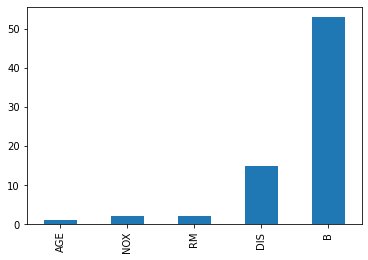

In [15]:
# 缺失值可视化
missing = null.isnull().sum()
missing = missing[missing > 0] # 筛选出有缺失值（大于0）的特征
missing.sort_values(inplace = True) # 排序
missing.plot.bar() # 调用pandas内置的条形图绘制

对于缺失值我们还可以采用热力图进行可视化，

<AxesSubplot:>

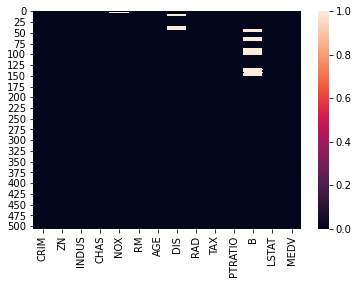

In [17]:
sns.heatmap(null.isnull())

这种方式还可以帮助我们看出缺失的位置，如果有些样本出现大量特征缺失的情况，在样本足够大的情况下也可以考虑删除.

3. 统计缺失比例

In [23]:
A = [] 
for col in null.columns:
    A.append((col,
             null[col].isnull().sum() * 100 / null.shape[0]))
pd.DataFrame(A, columns=['Features', 'missing rate'])

,Features,missing rate
0,CRIM,0.000000
1,ZN,0.000000
2,INDUS,0.000000
3,CHAS,0.000000
4,NOX,0.395257
5,RM,0.395257
6,AGE,0.197628
7,DIS,2.964427
8,RAD,0.000000
9,TAX,0.000000


从上表，我们统计了每一个特征的缺失比例，一般来说，如果缺失值超过95%的特征，我们会考虑删除它，因为意义不大. 此外，另一类特征也可以考虑删除，那就是方差特别小，或者说取值唯一的特征是没有意义的. 举个例子，如果在一次考试中，大家的数学成绩都是100分，那么其实我们是没有办法通过数学成绩来区分每位同学的能力的，也就是说数学这门课没有区分性，所以不具有分析的意义，可以删掉.

在Pandas中，我们可以采用```df.nunique()```来统计每个每个特征会有多少个不同取值.

In [29]:
null.nunique()

CRIM       504
ZN          26
INDUS       76
CHAS         2
NOX         81
RM         445
AGE        356
DIS        401
RAD          9
TAX         66
PTRATIO     46
B          326
LSTAT      455
MEDV       229
dtype: int64

为了更完美的呈现，我们将特征的唯一值个数一并加入到上面的统计表中，并且封装成函数，方便后续直接使用.

In [37]:
def df_stats(df):
    '''
    统计该df的缺失值，比例以及唯一值个数.
    '''
    L = []
    for col in df.columns:
        L.append((col, 
                  df[col].isnull().sum(),
                  df[col].isnull().sum() * 100 / df.shape[0],
                  df[col].nunique()))
    res = pd.DataFrame(L, columns = ['Feature', 
                                     'missing num',
                                     'missing rate',
                                     'unique num']) 
    return res

In [38]:
df_stats(null)

,Feature,missing num,missing rate,unique num
0,CRIM,0,0.000000,504
1,ZN,0,0.000000,26
2,INDUS,0,0.000000,76
3,CHAS,0,0.000000,2
4,NOX,2,0.395257,81
5,RM,2,0.395257,445
6,AGE,1,0.197628,356
7,DIS,15,2.964427,401
8,RAD,0,0.000000,9
9,TAX,0,0.000000,66


这下一目了然了！在这里我们呢简单粗暴的用均值填充，后面有机会我们会总结一下缺失值的处理方式.

### 变量分析

<img src="./figures/1_2_特征分析思路.png">

在变量分析中，我们延续了在概率论与数理统计中的研究思想.在概率论与数理统计中，我们首先研究了单变量随机变量的性质与特征刻画，研究透了之后，我们转而研究随机变量之间的关系. 在数据分析中亦是如此，我们会先分析一个变量的情况，包括但不限于：数据类型、分布情况、是否有离群值······；研究完单变量之后，转而研究变量之间的关系：相关性分析、分组统计···

In [ ]:
# https://www.kaggle.com/code/weibbi/boston-housing-price-w-visual-eda-prediction
# https://www.kaggle.com/code/imakash3011/boston-house-prices-advanced-regression-technique
# plotly安装：https://zhuanlan.zhihu.com/p/328972379